# Synchronization

## Equation
We have a logistic map:
$$
f \left( x \right) = \mu \cdot x \cdot \left( 1 - x \right) 
$$
We have cycle with order 2, when the equation
$$
x = \mu^2 \cdot x \cdot \left( 1 - x \right)\cdot \left [1 - \mu \cdot x \cdot \left( 1 - x \right) \right]
$$
has two solutions
$$
\begin{cases}
x_2 = \mu \cdot x_1 \cdot \left( 1 - x_2 \right)\\
x_1 = \mu \cdot x_2 \cdot \left( 1 - x_1 \right)
\end{cases}
$$

This means that either
$$
\begin{cases}
x_1 + x_2 = \frac{1 + \mu}{\mu} \\
x_1 \cdot x_2 = \frac{1 + \mu}{\mu^2}
\end{cases}
$$
Solutions are
$$
x_{1, 2} = \frac{1 + \mu \pm \sqrt{\left(1 + \mu \right) \cdot \left(\mu -3 \right)}}{2 \cdot \mu}
$$

The cycle with order 2 is real when $\mu>3$.

Finding the upper bound
$$
\left(f \left(f \left( x_1 \right)\right)\right)' = \mu^2 \cdot \left(1 - 2 \cdot \left( x_1 + x_2 \right) + 4 \cdot x_1 \cdot x_2 \right)
= - \mu^2 + 2 \cdot \mu + 4 
$$
Solutions are
$$
\begin{cases}
\mu_{1, 2} = 1 \pm \sqrt{6} \\
\mu_{1, 2} = 1 - \sqrt{6} \le 0
\end{cases}
$$
So
$$
3 \le \mu \le 3.45

We have a system
$$
\begin{cases}
U_{n+1}  = \frac{f \left(U_n + V_n \right) + f \left(U_n - V_n \right)}{2} \\
V_{n+1} = \left(\frac{1}{2} - \varepsilon \right) \cdot \left[f \left(U_n + V_n \right) - f \left(U_n - V_n \right) \right]
\end{cases}
$$
There are $V_0=0$. Then
$$
V_{n+1} = \left(\frac{1}{2} - \varepsilon \right) \cdot \left[f \left(U_n \right) - f \left(U_n  \right) \right] = 0
$$
That's mean $V_0 = 0$ - fixed point. 
$$
U_{n+1}  = f \left(U_n\right) 
$$


## Critical values

$$
U_crit = \frac{\mu \cdot U_0^2}{- \mu + 1 + 2 \cdot \mu \cdot U_0}
$$

$$
\varepsilon_{crit} = \frac{1}{- 2 \cdot \mu \cdot \left( 1 - 2 \cdot U_0 \right)}+ \frac{1}{2}
$$

If $V_n \ge 0$, then $\varepsilon_{crit}$ - lower bound

If $V_n \le 0$, then $\varepsilon_{crit}$ - upper bound



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
from matplotlib import rc
rc('font', size=18)
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

In [3]:
n = 1000
mu = 3.7
x0s = [0.1, 0.3, 0.6, 0.9]

In [4]:
def f(x):
    return mu * x * (1 - x)

def make_sequence(x0):
    sequence = [x0]
    for i in range(n):
        sequence.append(f(sequence[-1]))
    return sequence

def make_xy_item(x, y, epsilon):
    x_next = f(x) - epsilon * (f(x) - f(y))
    y_next = f(y) + epsilon * (f(x) - f(y))
    return x_next, y_next

def make_xy_system(x0, y0, epsilon):
    xs = []
    ys = []
    x_c, y_c = x0, y0
    for i in range(n):
        x_n, y_n = make_xy_item(x_c, y_c, epsilon)
        xs.append(x_n)
        ys.append(y_n)
        x_c = x_n
        y_c = y_n
    return xs, ys

def make_transition_from(xs, ys):
    return list(zip(*[((x + y) / 2, (x - y) / 2) for x, y in zip(xs, ys)]))

def draw_plots(xs, ys, titles, columns=5, rows=2, suptitle=''):
    f, axs = plt.subplots(columns, rows, sharex='col', sharey='row')
    if suptitle:
        f.suptitle(suptitle, fontsize=32)
    for i in range(columns):
        for j in range(rows):
            cur = j * columns + i
            axs[i, j].set_title(titles[cur])
            axs[i, j].plot(xs[cur], ys[cur])

# Task 2.1

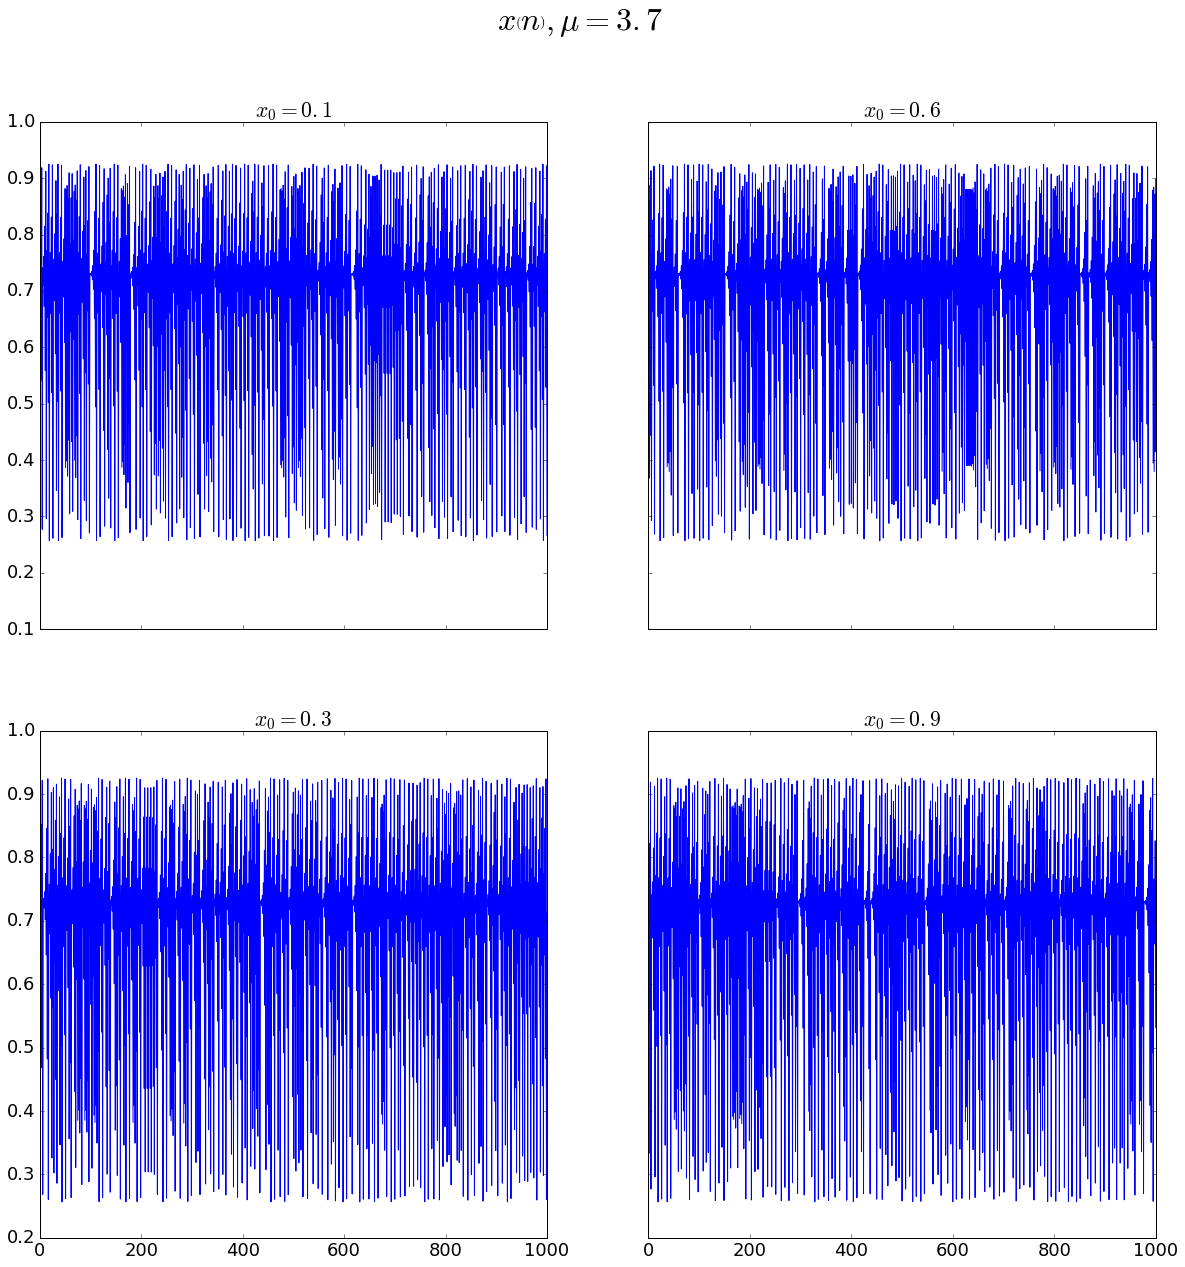

In [5]:
titles, xs, sequences = [], [], []
for x0 in x0s:
    sequences.append(make_sequence(x0))
    titles.append(r'$x_0 = %s$' % sequences[-1][0])
    xs.append(list(range(len(sequences[-1]))))
draw_plots(xs, sequences, titles, 2, 2, r'$x\left( n \right), \mu= %s$' % mu)

# Task 2.2

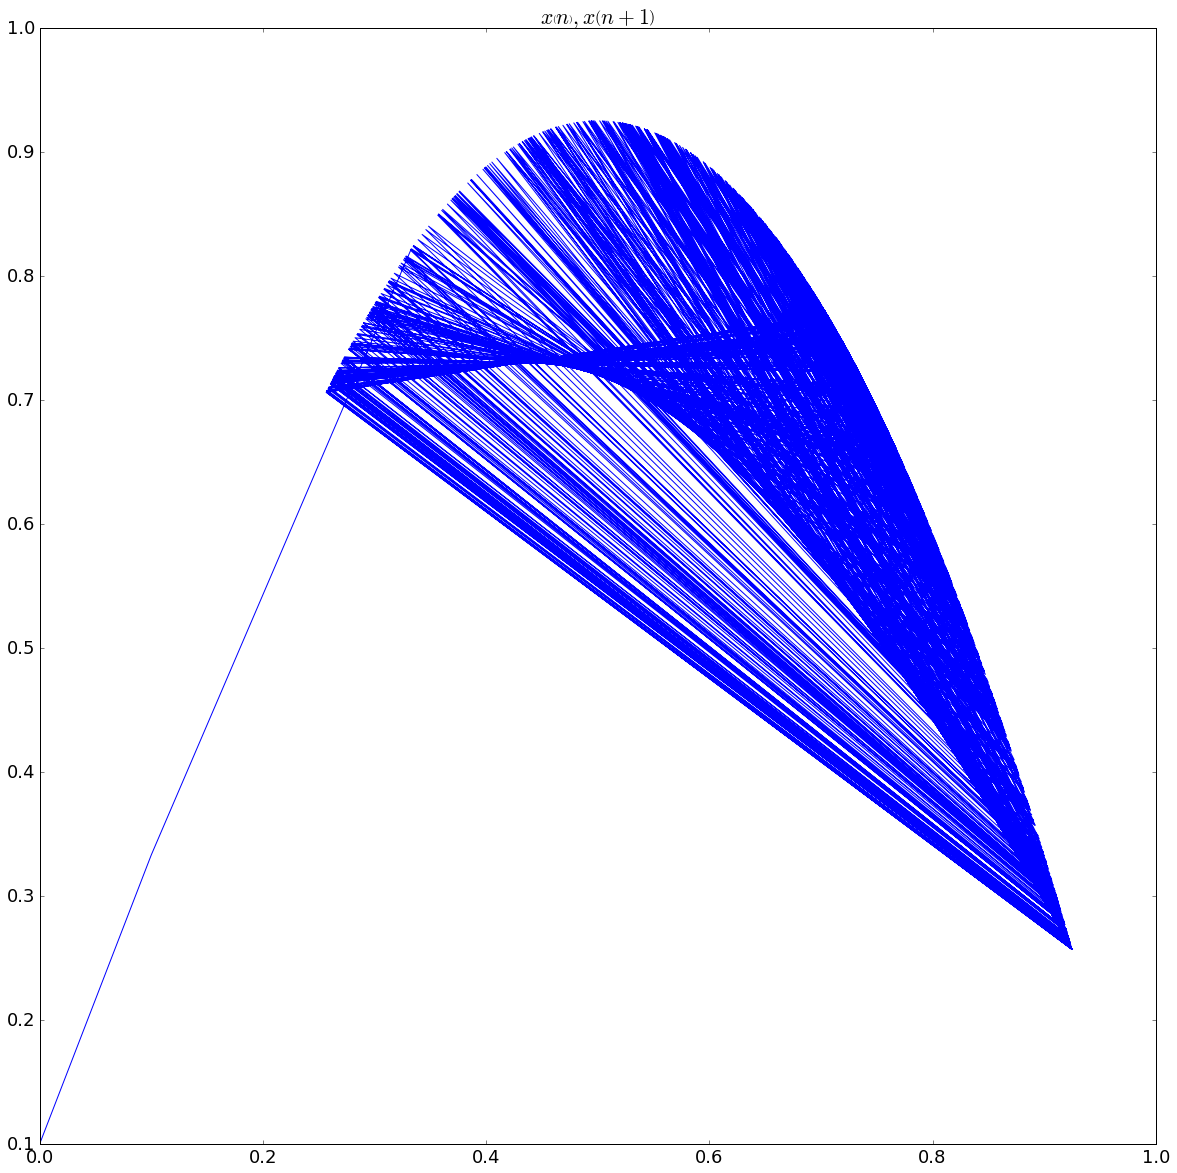

In [6]:
sequence = sequences[0]
sequence_shifted = sequence[:]
sequence_shifted.insert(0, 0)
sequence_shifted.pop(-1)

plt.title(r'$x\left( n \right), x\left( n+1 \right)$')
plt.plot(sequence_shifted, sequence)
plt.show()

The system looks like an attractor because points are grouped around point $\langle 0.5, 0.7 \rangle$

# Task 3

In [7]:
epsilons = [i for i in np.arange(0.05, 0.45, 0.04)]

In [8]:
xy_sequences = [(make_xy_system(x0s[0], x0s[1], epsilon), epsilon) for epsilon in epsilons]
uv_sequences = [(make_transition_from(*sequence[0]), sequence[1]) for sequence in xy_sequences]

# Task 4.1

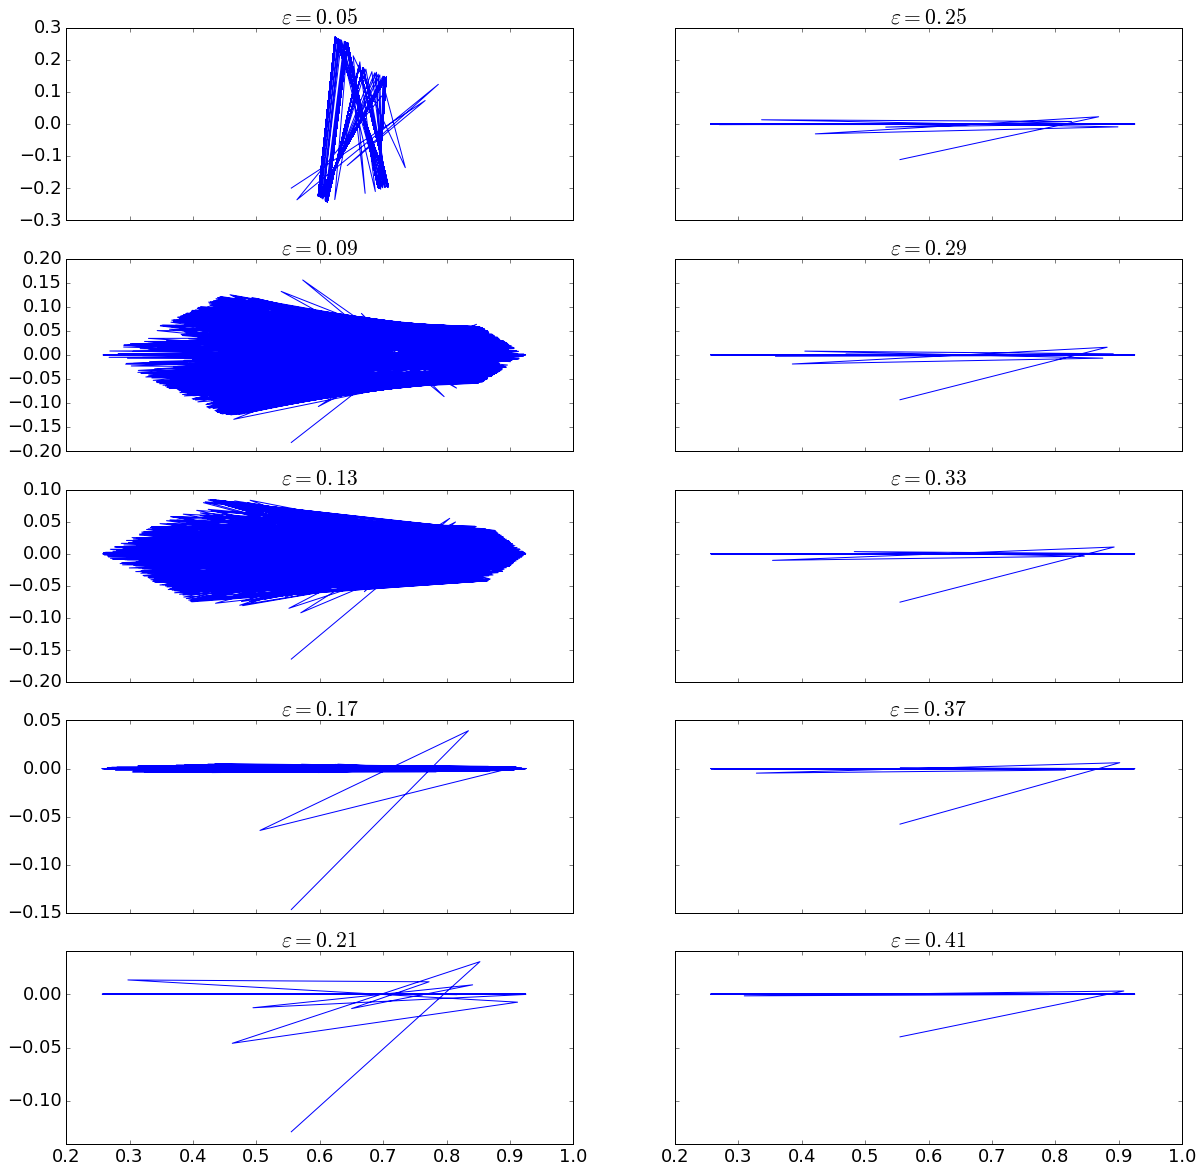

In [9]:
xs, ys, titles = [], [], []
for uv_sequence in uv_sequences:
    xs.append(uv_sequence[0][0])
    ys.append(uv_sequence[0][1])
    titles.append(r'$\varepsilon=%s$' % uv_sequence[1])
draw_plots(xs, ys, titles)

# Task 4.2

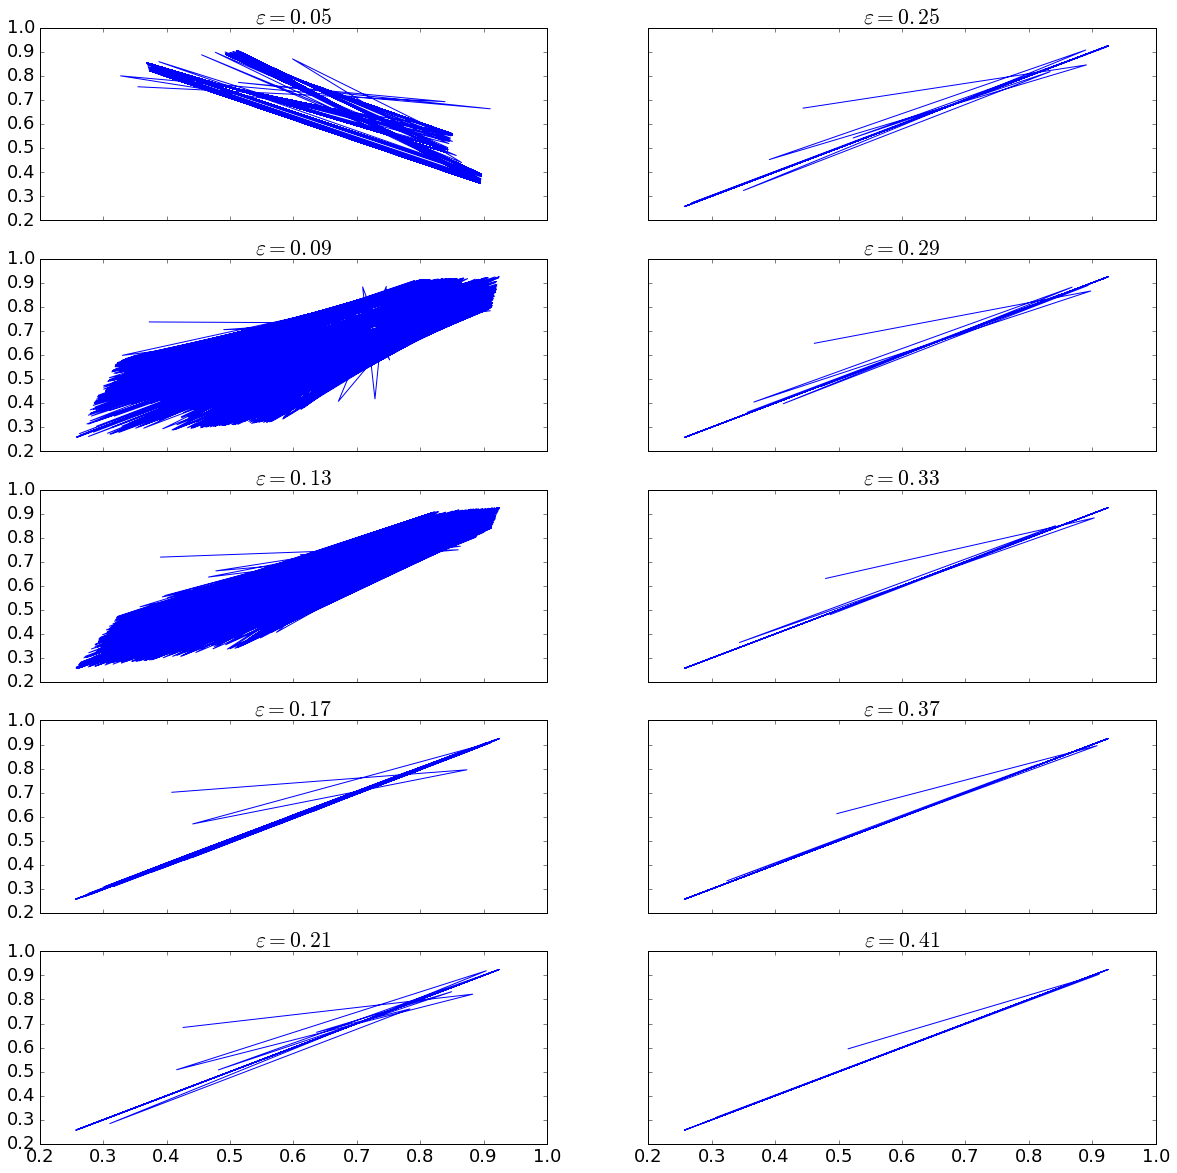

In [10]:
xs, ys, titles = [], [], []
for xy_sequence in xy_sequences:
    xs.append(xy_sequence[0][0])
    ys.append(xy_sequence[0][1])
    titles.append(r'$\varepsilon=%s$' % xy_sequence[1])
draw_plots(xs, ys, titles)

# Task 4.3

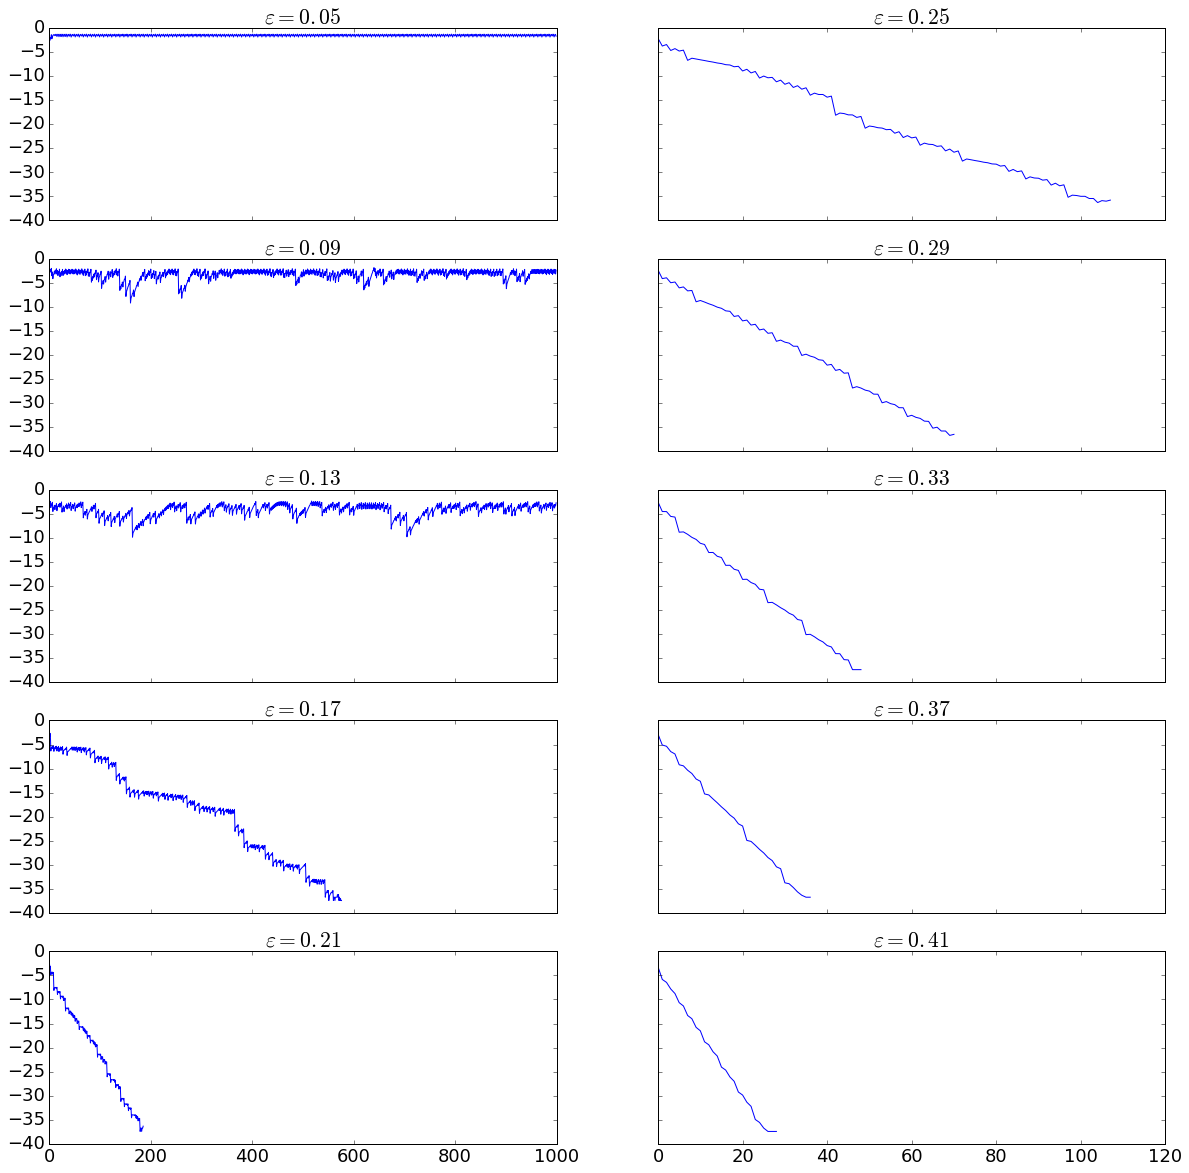

In [11]:
xs, ys, titles = [], [], []
for uv_sequence in uv_sequences:
    vn = [x for x in uv_sequence[0][1] if x != 0]
    titles.append(r'$\varepsilon=%s$' % uv_sequence[1])
    ys.append([np.log(np.abs(item)) for item in vn])
    xs.append(list(range(len(ys[-1]))))
draw_plots(xs, ys, titles)

# Task 5

Systems are starting synchronization at the moment $\varepsilon = 0.17$ --- their link look less stochastic.

With $\varepsilon = 0.25$ we can see synchronized behavior.

# Task 6

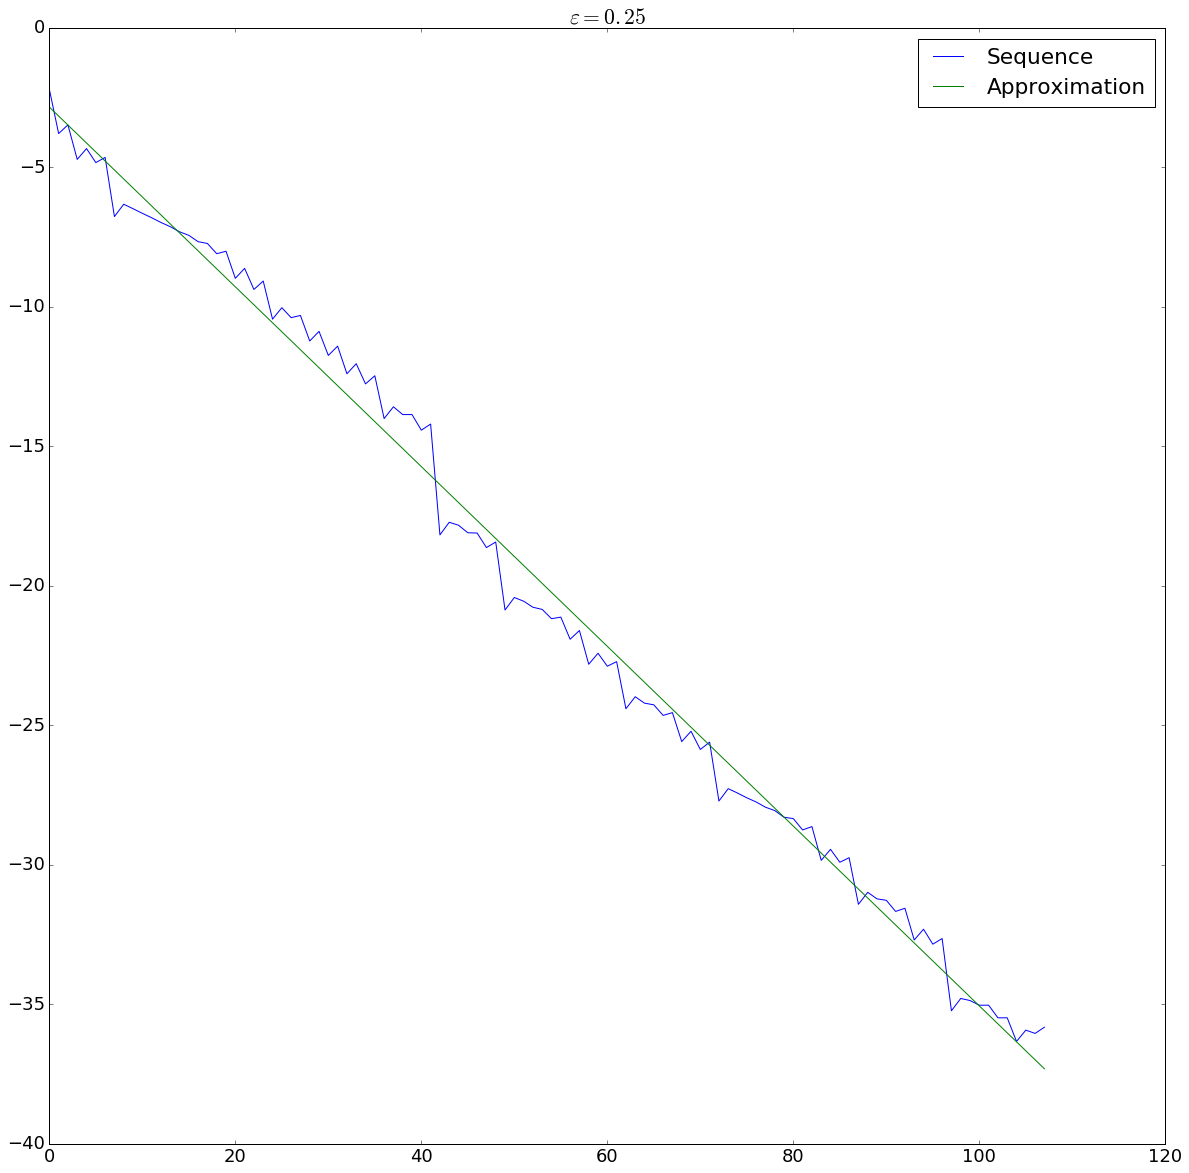

In [12]:
plt.title(r'$\varepsilon=%s$' % uv_sequences[5][1])
sequence = np.log(np.abs([x for x in uv_sequences[5][0][1] if x != 0]))
x = np.array(list(range(len(sequence))))
a, b = np.linalg.lstsq(np.vstack([x, np.ones_like(sequence)]).T, sequence)[0]

plt.plot(x, sequence, label='Sequence')
plt.plot(x, a * x + b, label='Approximation')
plt.legend()
plt.show()

In [13]:
a, 1/a

(-0.32216058937586317, -3.1040419994802808)

$$
\lambda = -0.32 \Longrightarrow \frac{1}{\lambda} = -3.1
$$